# Lecture 9 - Feature Extraction continued

An alternative approach to feature selection for dimensionality reduction is **feature extraction**. We will learn about a couple of fundamental techniques that will help us to summarize the information content of a dataset by transforming it onto a new feature subspace of lower dimensionality than the original one:

* **Principal Component Analysis (PCA)** for unsupervised data compression

* **Linear Discriminant Analysis (LDA)** as a supervised dimensionality reduction technique for maximizing class separability

Data compression is an important topic in machine learning, and it helps us to store and analyze the increasing amounts of data that are produced and collected in the modern age of technology.

## Principal Component Analysis (PCA)

Principal component analysis (PCA) is an unsupervised linear transformation technique that is widely used across different fields, most prominently for dimensionality reduction.

* PCA aims to find the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions that the original one. 

The orthogonal axes (**principal components**) of the new subspace can be interpreted as the directions of maximum variance given the constraint that the new feature axes are orthogonal to each other.

* PCA takes data from *sensor coordinates* to *data centric coordinates* using linear transformations.

* PCA uses a **linear transformation** to **minimize the redundancy** of the resulting transformed data (by ending up with data that is uncorrelated).
    * This means that every transformed dimension is more informative.
    * In this approach, the dimensionality of the space is still the same as the original data, but the space of features are now arranged such that they contain the most information.

* If we wish to reduce dimensionality of our feature space, we can choose only the features that carry over the most information in the linearly transformed space.
    * In other words, PCA will find the underlying **linear manifold** that the data is embedded in.

* **PCA finds the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one**.

### Steps of PCA

Consider the data $X$:

1. Subtract the mean $\mu = \frac{1}{N}\sum_{i=1}^N x_i$

2. Compute the covariance matrix $R_X$

3. Compute eigenvectors and eigenvalues of the matrix $R_X$. Tip: sort the eigenvectors ($e_i$) in decreasing eigenvalue ($\lambda_i$) order.

4. The linear transformation $A$ will be: $A = \left[\begin{array}{c} \overrightarrow{u_{1}}\\ \overrightarrow{u_{2}} \end{array}\right]$, where $\lambda_1 > \lambda_2$

5. Transformed data: $y=Ax$

Note that the formal definition of covariance already accounts for demeaning the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('seaborn')

import pandas as pd
import seaborn as sns

### Example: Eigenfaces

* Part of this example comes from: http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

n_row, n_col = 3, 3
n_components = n_row * n_col
image_shape = (64, 64)

# Load faces 
dataset = fetch_olivetti_faces(shuffle=True)
faces = dataset.data
n_samples, n_features = faces.shape

print("Dataset consists of %d faces" % n_samples)

#Define function to plot imagery
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure()
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        comp = comp.reshape((64,64))
        plt.imshow(comp,cmap='gray')
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

In [ ]:
from sklearn.decomposition import PCA as PCA_skl
    
scikit_pca = PCA_skl(n_components = n_components, whiten=True)
X_spca = scikit_pca.fit_transform(faces.T)

plot_gallery("Olivetti faces", faces[0:n_components,:])
plot_gallery('Results', X_spca.T)

### Example: PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data. The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this looks with the digits data. First we will plot several of the input noise-free data:

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(8, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Now lets add some random noise to create a noisy dataset, and re-plot it:

In [ ]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

It's clear by eye that the images are noisy, and contain spurious pixels. Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:

In [ ]:
pca = PCA_skl(0.50).fit(noisy)
pca.n_components_

Here 50% of the variance amounts to 12 principal components. Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:

In [ ]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

### Example: Half-Moons

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, random_state = 123)
plt.scatter(X[y==0,0], X[y==0, 1], color='red', marker = '^', alpha=0.5)
plt.scatter(X[y==1,0], X[y==1, 1], color='blue', marker = 'o', alpha=0.5)
plt.show()

In [ ]:
scikit_pca = PCA_skl(n_components = 2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X_spca[y==0,0], X_spca[y==0,1], color='red', marker = '^', alpha=0.5)
ax[0].scatter(X_spca[y==1,0], X_spca[y==1,1], color='blue', marker = 'o', alpha=0.5)
ax[1].scatter(X_spca[y==0,0], np.zeros((50,1)), color='red', marker = '^', alpha=0.5)
ax[1].scatter(X_spca[y==1,0], np.zeros((50,1)), color='blue', marker = 'o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

# Linear Discriminant Analysis

**Linear Discriminant Analysis (LDA)** can be used as a technique for feature extraction to increase the computational efficiency and reduce the degree of overfitting due to the curse of dimensionality in nonregularized models.

* The general concept behind LDA is very similar to PCA, whereas PCA attempts to find the orthogonal component axes of maximum variance in a dataset; the goal in LDA is to find the feature subspace that optimizes class separability.

* Both LDA and PCA are linear transformation techniques that can be used to reduce the number of dimensions in a dataset; PPCA is an **unsupervised** algorithm, whereas LDA is a **supervised** algorithm.

<div><img src="figures/LDA.png", width="400"><!div>

A linear discriminant, as shown on the x-axis (LD 1), would separate the two normally distributed classes well. Although the exemplary linear discriminant shown on the y-axis (LD 2) captures a lot of the variance in the dataset, it would fail as a good linear discriminant since it does not capture any of the class-discriminatory information.

* One **assumption** in LDA is that the data is normally distributed. Also, we assume that the classes have identical covariance matrices and that the features are statistically independent of each other. 

### Steps of LDA

1. Standardize the $d$-dimensional dataset ($d$ is the number of features).

2. For each class, compute the $d$-dimensional mean vector $\mathbf{m}$.

3. Construct the between-class scatter matrix $S_B$ and the within-class scatter matrix $S_w$.

4. Compute the eigenvectors and corresponding eigenvalues of the matrix $S_W^{-1}S_B$.

5. Choose the $k$ eigenvectors that correspond to the $k$ largest eigenvalues to construct a $d\times k$-dimensional transformation matrix $W$; the eigenvectors are the columns of this matrix.

6. Project the samples onto the new feature subspace using the transformation matrix $W$.

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [3]:
df_wine.columns = ['Class label', 'Alcohol','Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium','Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines','Proline']

In [4]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [44]:
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [46]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

## Computing the Scatter Matrices

Since we have already standardized the features of the Wine dataset, we can skip the first step and proceed with the calculation of the mean vectors, which we will use to construct the within-class scatter matrix and between-class scatter matrix, respectively. Each mean vector $\mathbf{m}_i$ stores the mean feature value $\mu_m$ with respect to the samples of class $i$:

$$\mathbf{m}_i = \frac{1}{n_i} \sum_{x\in D_i}^c \mathbf{x}_m$$

In [47]:
np.set_printoptions(precision=4)

In [48]:
mean_vecs = []

for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MV 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]



Using the mean vectors, we can now compute the within-class scatter matrix $S_W$:

$$S_W = \sum_{i=1}^c S_i$$

This is calculated by summing up the individual scatter matrices $S_i$ of each individual class $i$:

$$S_i = \sum_{x\in D_i}^c (\mathbf{x}-\mathbf{m}_i)(\mathbf{x}-\mathbf{m}_i)^T$$

In [11]:
d = X_train_std.shape[1] # number of features

In [12]:
S_W = np.zeros((d, d))

for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.zeros((d, d))
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row-mv)@(row-mv).T
    S_W += class_scatter

print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


The assumption that we are making when we are computing the scatter matrices is that the class labels in the training set are uniformly distributed. However, if we print the number of class labels, we see that this assumption is violated:

In [13]:
print('Class label distribution: %s'% np.bincount(y_train)[1:])

Class label distribution: [40 49 35]


Thus, we want to scale the individual scatter matrices $S_i$ before we sum them up as scatter matrix $S_W$. When we divide the scatter matrices by the number of class samples $N_i$, we can see that computing the scatter matrix is in fact the same as
computing the covariance matrix $\Sigma_i$. The covariance matrix is a normalized version of the scatter matrix:

$$\Sigma_i = \frac{1}{N_i} S_W = \frac{1}{N_i} \sum_{x\in D_i}^c (\mathbf{x}-\mathbf{m}_i)(\mathbf{x}-\mathbf{m}_i)^T $$

In [14]:
d = X_train_std.shape[1] # number of features

S_W = np.zeros((d, d))

for label,mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter

print('Scaled within-class scatter matrix: %sx%s'% (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


After we have computed the scaled within-class scatter matrix (or covariance matrix), we can move on to the next step and compute the between-class scatter matrix $S_B$:

$$S_B = \sum_{i=1}^c N_i (\mathbf{m}_i - \mathbf{m})(\mathbf{m}_i - \mathbf{m})^T$$

Here, $\mathbf{m}$ is the overall mean that is computed, including samples from all classes.

In [15]:
mean_overall = np.mean(X_train_std, axis=0)

d = X_train_std.shape[1] # number of features
S_B = np.zeros((d, d))
for i,mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train==i+1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)
    mean_overall = mean_overall.reshape(d, 1)
    
S_B += n * (mean_vec - mean_overall)@(mean_vec - mean_overall).T

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


## Selecting linear discriminants for the new feature subspace

The remaining steps of the LDA are similar to the steps of the PCA. However, instead of performing the eigendecomposition on the covariance matrix, we solve the generalized eigenvalue problem of the matrix $S_W^{-1}S_B$:

In [16]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W)@S_B)

In [17]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

print('Eigenvalues in decreasing order:\n')

for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

269.79975787296576
1.795199056045561e-14
1.795199056045561e-14
1.6975867290375297e-14
1.3038808382754244e-14
9.696789119648791e-15
9.696789119648791e-15
4.285850964666618e-15
3.837441933944329e-15
2.441348340319988e-15
2.441348340319988e-15
3.098533689843918e-17
0.0


Let's now stack the two most discriminative eigenvector columns to create the transformation matrix $W$:

In [55]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))

In [56]:
print('Matrix W:\n', w)

Matrix W:
 [[-0.0102  0.0545]
 [-0.0823  0.2535]
 [-0.0546  0.0185]
 [-0.122   0.1433]
 [ 0.0062 -0.0382]
 [-0.2257  0.1696]
 [ 0.8044  0.6151]
 [ 0.0942 -0.2227]
 [-0.0508 -0.0206]
 [-0.2398  0.4415]
 [ 0.1122 -0.1089]
 [ 0.3914 -0.1233]
 [ 0.2062 -0.0605]]


## Projecting samples onto the new feature space

Using the transformation matrix $W$ that we created in the previous subsection, we can now transform the training data set by multiplying the matrices:

$$X' = XW$$

In [57]:
X_train_lda = X_train_std@w

## LDA via scikit-learn

In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [60]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [61]:
# Code from "Python Machine Learning" textbook

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


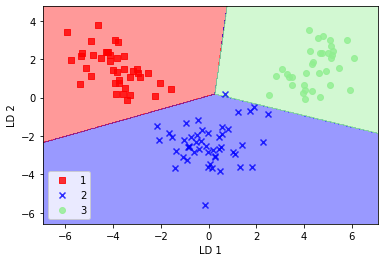

In [62]:
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

## Interpretation and Limitations

This gives two different **interpretations** of LDA:

* It is optimal *if and only if* the classes are Gaussian and have equal covariance.

* Better than PCA, but not necessarily good enough.

* A classifier on the LDA features, is equivalent to the boundary after the approximation of the data by two Gaussians with equal covariance.

**Limitations of LDA**:

1. LDA produces at most $C-1$ feature projections, where $C$ is the number of classes.

2. If the classification error estimates establish that more features are needed, some other method must be employed to provide those additional features.

3. LDA is a parametric method (it assumes unimodal Gaussian likelihoods).

4. If the distributions are significantly non-Gaussian, the LDA projections may not preserve complex structure in the data needed for classification.

5. LDA will also fail if discriminatory information is not in the mean but in the variance of the data.

A popular variant of LDA are *Multi-layer perceptrons* (or MLPs).

## Comparing Direction of Projection between PCA and LDA

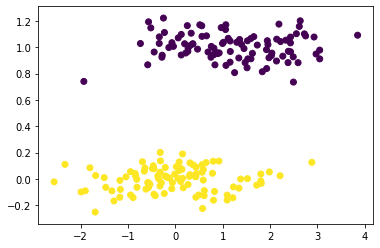

In [80]:
# Generate Data

N1 = 100 #number of points for class1
N2 = 100 #number of points for class0
covM = [1,0.01]*np.eye(2) # covariance matrix
data = np.random.multivariate_normal([0,0], covM, N1) #generate points  for class 1
t = np.ones([1,N1]) #labels for class 1
X = np.vstack((data, np.random.multivariate_normal([1,1], covM, N2))) #generate points for class 0
t = np.hstack((t,np.zeros([1,N2]))) #labels for class 0
labels  = t[0]

plt.scatter(X[:,0],X[:,1],c=labels); plt.show();

In [81]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import math 

def fisherDiscriminant(data,t):
    data1 = data[t==0,:]
    data2 = data[t==1,:]
    mean1 = np.atleast_2d(np.mean(data1,0))
    mean2 = np.atleast_2d(np.mean(data2,0))
    #Sb  = (mean2 - mean1).T@(mean2 - mean1)
    Sw1 = np.dstack([(data1[i,:]-mean1).T@(data1[i,:]-mean1) for i in range(data1.shape[0])])
    Sw2 = np.dstack([(data2[i,:]-mean2).T@(data2[i,:]-mean2) for i in range(data2.shape[0])])
    Sw = np.sum(Sw1,2) + np.sum(Sw2,2)
    w = np.linalg.inv(Sw)@(mean2 - mean1).T
    w = w/np.linalg.norm(w) 
    #[l, v] = np.linalg.eig(np.linalg.inv(Sw)@Sb)
    #w = v[:,l.argsort()[1]]
    data_t = data@w
    return w, data_t

def PCA(data,d):
    N = np.size(data,0)
    data = data - data.mean(axis=0)
    cov_mat = np.cov(data.T)
    eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
    index = eigen_vals.argsort()[::-1]
    sorted_eigevecs = eigen_vecs[:,index]
    w = sorted_eigevecs[:,0:d]
    data_t = data@w
    return w, data_t

def directions(data, labels, v):
    v_perp = np.array([v[1], -v[0]])
    b = ((np.mean(data[labels==0,:],axis=0)+np.mean(data[labels==1,:],axis=0))/2)@v
    lambda_vec = np.linspace(-2,2,len(data))
    v_line = lambda_vec * v
    decision_boundary = b * v + lambda_vec * v_perp
    return v_line, decision_boundary

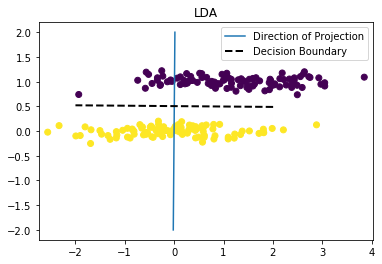

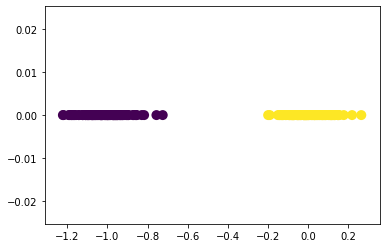

In [84]:
v, Y = fisherDiscriminant(X,labels)

fig = plt.figure()
plt.scatter(X[:,0],X[:,1],c=labels)

v_line, decision_boundary = directions(X, labels, v);
plt.plot(v_line[0], v_line[1], label='Direction of Projection')
plt.plot(decision_boundary[0,:], decision_boundary[1,:],'--k',linewidth=2, label='Decision Boundary')
plt.title("LDA"); plt.axis('equal'); plt.legend(loc='best'); plt.show()

fig = plt.figure()
plt.scatter(Y[:,np.newaxis],np.zeros(len(Y)),c=labels,linewidth=0,s=100);

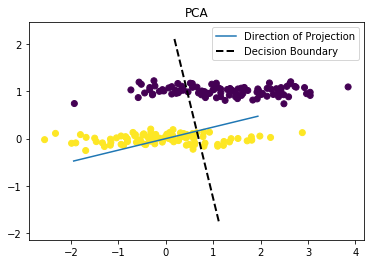

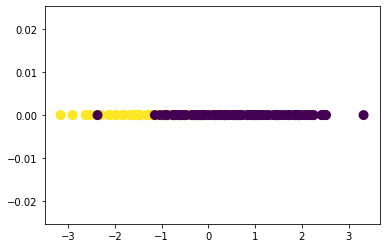

In [85]:
v, Y = PCA(X,1)

fig = plt.figure()
plt.scatter(X[:,0],X[:,1],c=labels)

v_line, decision_boundary = directions(X, labels, v);
plt.plot(v_line[0], v_line[1],label='Direction of Projection')
plt.plot(decision_boundary[0,:], decision_boundary[1,:],'--k',linewidth=2,label='Decision Boundary')
plt.title("PCA"); plt.axis('equal'); plt.legend(loc='best'); plt.show()

fig = plt.figure()
plt.scatter(Y[:,np.newaxis],np.zeros(len(Y)),c=labels,linewidth=0,s=100);